# Analysis Categorization Performance of Various LogP Descriptors for Indocyanine Nanoparticle Formation
Experimental data of 60 drugs for indocyanine nanoparticle formation was tested with IR783 dye.  
ALOGP2 and cLogP values were calculated using Dragon 6 and Chem3D softwares, respectively and will be imported as a csv file. OpenEye XLogP values were calculated programmatically in this notebook using OpenEye OEchem (version 2.0.5) and OEmolprop (version 2.4.1) tools, using mol files of drugs as input.

In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from __future__ import print_function
from __future__ import division

In [3]:
df_exp_data = pd.read_csv("experimental_dataset_N60_ALOGP2_cLogP.csv")
df_exp_data.head()

,Drug Name,SpMAX4_Bh(s),ALOGP2,CLogP,Experimental INP Formation,SpMAX4_Bh(s) Analysis Group
0,ABT737,7.00,67.200,10.04,Yes,Validation
1,Apitolisib,5.01,1.800,1.35,No,Validation
2,Avagacestat,8.00,16.000,3.05,Yes,Validation
3,Avasimibe,4.79,67.695,9.70,Yes,Validation
4,AZD-4547,4.72,17.700,4.43,No,Validation


## A. ALOGP2
### A.1. Plot ALOGP2 vs ALOGP2 rank

In [4]:
# Convert data type to float before sorting
df_exp_data[["SpMAX4_Bh(s)","ALOGP2"]] = df_exp_data[["SpMAX4_Bh(s)","ALOGP2"]].apply(pd.to_numeric)
df_exp_data.dtypes

Drug Name                       object
SpMAX4_Bh(s)                   float64
ALOGP2                         float64
CLogP                          float64
Experimental INP Formation      object
SpMAX4_Bh(s) Analysis Group     object
dtype: object

In [5]:
df_exp_sorted = df_exp_data.sort_values(by="ALOGP2", ascending=1).reset_index(drop=True)
df_exp_sorted["ALOGP2 rank"]=df_exp_sorted.index
df_exp_sorted.head()

,Drug Name,SpMAX4_Bh(s),ALOGP2,CLogP,Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,ALOGP2 rank
0,Forskolin,6.44,0.5,1.31,No,Validation,0
1,Voxtalisib,4.62,0.7,0.74,No,Validation,1
2,Apitolisib,5.01,1.8,1.35,No,Validation,2
3,Camptotecin,4.99,3.0,0.60,No,Training,3
4,INK128,4.75,3.1,1.41,No,Validation,4


In [6]:
df_exp_yes_sorted = df_exp_sorted.loc[df_exp_sorted["Experimental INP Formation"] == "Yes"].reset_index(drop=True)
df_exp_no_sorted = df_exp_sorted.loc[df_exp_sorted["Experimental INP Formation"] == "No"].reset_index(drop=True)
df_exp_no_sorted.head()

,Drug Name,SpMAX4_Bh(s),ALOGP2,CLogP,Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,ALOGP2 rank
0,Forskolin,6.44,0.5,1.31,No,Validation,0
1,Voxtalisib,4.62,0.7,0.74,No,Validation,1
2,Apitolisib,5.01,1.8,1.35,No,Validation,2
3,Camptotecin,4.99,3.0,0.60,No,Training,3
4,INK128,4.75,3.1,1.41,No,Validation,4


/Users/isikm/opt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


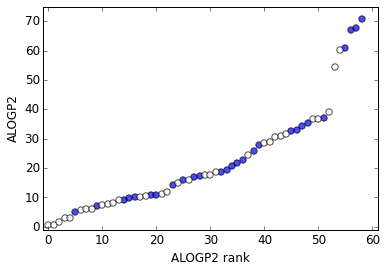

In [7]:
ALOGP2_array_yes_sorted = df_exp_yes_sorted.ix[:,"ALOGP2"]
ALOGP2_rank_array_yes_sorted = df_exp_yes_sorted.ix[:,"ALOGP2 rank"]
ALOGP2_array_no_sorted = df_exp_no_sorted.ix[:,"ALOGP2"]
ALOGP2_rank_array_no_sorted = df_exp_no_sorted.ix[:,"ALOGP2 rank"]

plt.rcParams.update({'font.size': 12})
fig = plt.figure(1, figsize=(6,4))

plt.scatter(ALOGP2_rank_array_yes_sorted, ALOGP2_array_yes_sorted, alpha=0.7, c="b", s=40 )
plt.scatter(ALOGP2_rank_array_no_sorted, ALOGP2_array_no_sorted, alpha=0.7,  c="w", s=40)
plt.xlabel("ALOGP2 rank")
plt.ylabel("ALOGP2")
plt.xlim(-1,61)
plt.ylim(-1,75)
plt.savefig("ALOGP2_rank.png", dpi=200)
plt.savefig("ALOGP2_rank.svg")

### A.2. ALOGP2 Box Plot

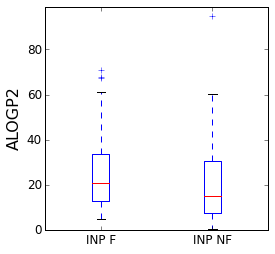

In [8]:
df_exp_yes = df_exp_data.loc[df_exp_data["Experimental INP Formation"] == "Yes"].reset_index(drop=True)
df_exp_no = df_exp_data.loc[df_exp_data["Experimental INP Formation"] == "No"].reset_index(drop=True)

SpMax4_array_yes = df_exp_yes.ix[:,"SpMAX4_Bh(s)"]
ALOGP2_array_yes = df_exp_yes.ix[:,"ALOGP2"]
SpMax4_array_no = df_exp_no.ix[:,"SpMAX4_Bh(s)"]
ALOGP2_array_no = df_exp_no.ix[:,"ALOGP2"]

data=[ALOGP2_array_yes, ALOGP2_array_no]

fig = plt.figure(1, figsize=(4,4))
ax = plt.subplot(1,1,1)

ax.boxplot(data)
ax.set_xticklabels(["INP F","INP NF"])
ax.set_ylabel("ALOGP2", size=16)
ax.set_ylim(0,99)
fig.savefig("ALOGP2_boxplot.png", dpi=200)
plt.savefig("ALOGP2_boxplot.svg")

In [9]:
from scipy import stats
stats.ttest_ind(ALOGP2_array_yes, ALOGP2_array_no, equal_var=False)
import numpy as np, statsmodels.stats.api as sms

print(stats.ttest_ind(ALOGP2_array_yes, ALOGP2_array_yes, equal_var=False))
    
cm = sms.CompareMeans(sms.DescrStatsW(ALOGP2_array_yes), sms.DescrStatsW(ALOGP2_array_yes))
print("   95% CI: ", cm.tconfint_diff(usevar='unequal'))

Ttest_indResult(statistic=0.0, pvalue=1.0)
   95% CI:  (-10.500004438035416, 10.500004438035416)


### A.3. ALOGP2 Logistic Regression

In [10]:
from scipy import optimize

def logistic(params,x):
    """ 
    Logistic function

    Parameters
    ----------
    params : list or numpy array
      the three parameters of the logistic function
      First parameter is set to 1, to make function
      span 0 to 1.
    x : numpy array
      the explanatory variable
   
    Return
    ------
    numpy array
      the output of the logistic function

    """
    params[0]=1
    return params[0]/(1+np.exp(-x*params[1] - params[2])) 

def residuals(params):
    predicted = logistic(params,x)
    return np.sum((y-predicted)**2)

In [11]:
df_exp_data["Experimental Category"]=None

for i,row in enumerate(df_exp_data.iterrows()):
    if df_exp_data.ix[i,"Experimental INP Formation"] == "Yes" :
        df_exp_data.ix[i, "Experimental Category"] = 1
    else:
        df_exp_data.ix[i, "Experimental Category"] = 0

df_exp_data.head()

,Drug Name,SpMAX4_Bh(s),ALOGP2,CLogP,Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,Experimental Category
0,ABT737,7.00,67.200,10.04,Yes,Validation,1
1,Apitolisib,5.01,1.800,1.35,No,Validation,0
2,Avagacestat,8.00,16.000,3.05,Yes,Validation,1
3,Avasimibe,4.79,67.695,9.70,Yes,Validation,1
4,AZD-4547,4.72,17.700,4.43,No,Validation,0


For ALOGP2: 
The predicted parameters are [ 1.          0.01700695 -0.5872036 ]
Threshold logP:  34.5272702658


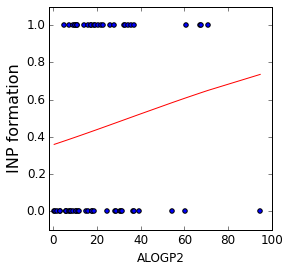

In [12]:
fig = plt.figure(1, figsize=(4,4), dpi=200)

df_sorted = df_exp_data.sort_values(by="ALOGP2", ascending=1).reset_index(drop=True)
initial_guess = [1,1,1]
x=df_sorted.ix[:, "ALOGP2"].astype(float)
y=df_sorted.ix[:, "Experimental Category"]

fit = optimize.minimize(residuals,initial_guess,method='Nelder-Mead')
print("For {}: \nThe predicted parameters are".format("ALOGP2"), fit.x)

# Inflection point is x_0/b
threshold_logP=(-1)*fit.x[2]/fit.x[1]
print("Threshold logP: ", threshold_logP)
    
plt.scatter(x,y)
predicted = logistic(fit.x, x)
plt.plot(x,predicted,color="red")
plt.xlabel('ALOGP2')
plt.ylabel('INP formation', size=16)
plt.ylim(-0.1,1.1)
plt.xlim(-2,100)
plt.savefig("ALOGP2_logistic_fit.png")
plt.savefig("ALOGP2_logistic_fit.svg")

### A.4. ALOGP2 ROC Curve

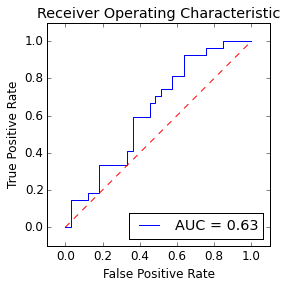

In [13]:
from sklearn import metrics

y_actual = df_sorted["Experimental Category"]
# predicted score come from logistic regression
y_predicted = predicted

# ROC
fpr, tpr, thresholds = metrics.roc_curve(y_actual, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Bootstrap for ROC AUC confidence intervals

Original ROC area: 0.629
95% Confidence interval for the score: [0.474 - 0.762]


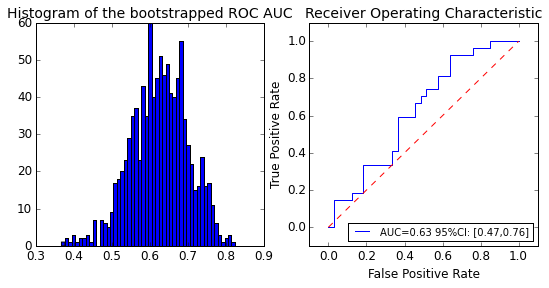

In [14]:
y_actual = np.array(y_actual).astype(int)
y_predicted = np.array(y_predicted)
print("Original ROC area: {:0.3f}".format(metrics.roc_auc_score(y_actual, y_predicted)))

n_bootstraps = 1000
rng_seed = 0  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):

    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.random_integers(0, len(y_predicted) - 1, len(y_predicted))
 
    if len(np.unique(y_actual[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = metrics.roc_auc_score(y_actual[indices], y_predicted[indices])
    bootstrapped_scores.append(score)
    #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

fig = plt.figure(1, figsize=(9,4))
plt.subplot(1,2,1)
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC', size=14)
# plt.show()

sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 95% confidence interval
# 95% CI percentiles to 0.025 and 0.975
confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
print("95% Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

# Plotting ROC curve
#fig = plt.figure(1, figsize=(4,4))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic', size=14)
plt.plot(fpr, tpr, 'b', label='AUC={0:0.2f} 95%CI: [{1:0.2f},{2:0.2f}]'.format(roc_auc, confidence_lower, confidence_upper))
plt.legend(loc='lower right', prop={'size':10})
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ALOGP2_ROC_with_histogram.png", dpi=200)
plt.savefig("ALOGP2_ROC_with_histogram.svg")

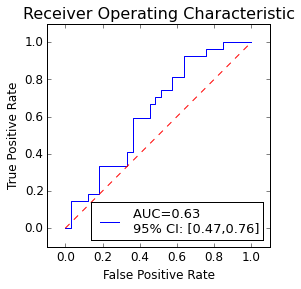

In [15]:
# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic',  size=16)
plt.plot(fpr, tpr, 'b', label='AUC={0:0.2f} \n95% CI: [{1:0.2f},{2:0.2f}]'.format(roc_auc, confidence_lower, confidence_upper))
plt.legend(loc='lower right', prop={'size':13})
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ALOGP2_ROC.png", dpi=200)
plt.savefig("ALOGP2_ROC.svg")

### A.5. ALOGP2 Confusion Matrix

In [16]:
# Predicted INP formation category based on ALOGP2 value
df_exp_data["Pred Category by ALOGP2"]= None 
    
for i, row in enumerate(df_exp_data.iterrows()):
    logP = float(df_exp_data.ix[i, "ALOGP2"])
    #print(logD)
    if logP < threshold_logP:
        df_exp_data.ix[i, "Pred Category by ALOGP2"] = 0
    else:
        df_exp_data.ix[i, "Pred Category by ALOGP2"] = 1
df_exp_data.head()

,Drug Name,SpMAX4_Bh(s),ALOGP2,CLogP,Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,Experimental Category,Pred Category by ALOGP2
0,ABT737,7.00,67.200,10.04,Yes,Validation,1,1
1,Apitolisib,5.01,1.800,1.35,No,Validation,0,0
2,Avagacestat,8.00,16.000,3.05,Yes,Validation,1,0
3,Avasimibe,4.79,67.695,9.70,Yes,Validation,1,1
4,AZD-4547,4.72,17.700,4.43,No,Validation,0,0


In [17]:
exp_NP = df_exp_data.ix[:,"Experimental Category"].astype(int) # Experimental category
pred_NP = df_exp_data.ix[:, "Pred Category by ALOGP2"].astype(int) # Predicted category

actual = pd.Series(exp_NP, name= "Actual")
predicted = pd.Series(pred_NP, name= "Predicted")
df_confusion = pd.crosstab(actual, predicted)
    
# Accuracy = (TP+TN)/(TP+TN+FP+FN)
TP = df_confusion.ix[1,1]
TN = df_confusion.ix[0,0]
FP = df_confusion.ix[0,1]
FN = df_confusion.ix[1,0]
    
accuracy = (TP+TN)/(TP+TN+FP+FN)
    
print("ALOGP2", "\nAccuracy: {:.2f}".format(accuracy))
print("ALOGP2 threshold= {:.2f}\n".format(threshold_logP))
print(df_confusion)    

ALOGP2 
Accuracy: 0.55
ALOGP2 threshold= 34.53

Predicted   0  1
Actual          
0          27  6
1          21  6


## B. OpenEye XLogP

In [18]:
# Creating dataframe for the list of molecules
path = "./"
filename="mol_file_list_N60.txt"
file = open(os.path.join(path, filename), "r")

filename_list = []
for line in file:
    filename_list.append(line.split('\n')[0])

print(len(filename_list))
print(filename_list[:5])

df_molecules = pd.DataFrame(filename_list)
df_molecules.columns= ["NAME"]
print(df_molecules.size)

df_molecules["molecule label"] = None

60
['ABT737.mol', 'AZD-4547.mol', 'Apitolisib.mol', 'Avagacestat.mol', 'Avasimibe.mol']
60


#### Creating SMILES strings for all molecules using OpenEye

In [19]:
from openeye import oechem, oedepict, oemolprop

df_molecules["smiles"] = None

ifs = oechem.oemolistream()
ofs = oechem.oemolostream()

ifs.SetFormat(oechem.OEFormat_MOL2)
ofs.SetFormat(oechem.OEFormat_SMI)

for i, row in enumerate(df_molecules.iterrows()):
    
    df_molecules.ix[i,"molecule label"] = re.split("[.]", df_molecules.ix[i,"NAME"])[0]
    
    file_name = df_molecules.ix[i,0]
    mol_file_path = "./mol_files_of_60_drugs"
    this_path = os.path.join(mol_file_path, file_name)
    mol_file = ifs.open(os.path.join(this_path))
   
    for mol in ifs.GetOEGraphMols():
        #print ("Number of atoms:", mol.NumAtoms())
        #print ("Canonical isomeric SMILES:", OEMolToSmiles(mol))
        df_molecules.ix[i,"smiles"] = oechem.OEMolToSmiles(mol)
        
df_molecules.head()

,NAME,molecule label,smiles
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...


#### XLogP Calculation

In [20]:
# make new column for XlogP data 
df_molecules["XlogP"] = None

for i, row in enumerate(df_molecules.iterrows()):
    smiles = df_molecules.ix[i,"smiles"]
    mol = oechem.OEGraphMol()
    oechem.OESmilesToMol(mol, str(smiles))
    
    try: 
        logP=oemolprop.OEGetXLogP(mol)
    except RuntimeError:
            print("Error: i=",i," ", df_molecules.ix[i, "NAME"])
            logP=float("NaN")
            
    df_molecules.ix[i,"XlogP"] = float(logP)
    del mol

# rename columnnames before merging with experimental data
df_molecules.rename(columns={"NAME":"FILENAME", "molecule label":"Drug Name"}, inplace=True)
df_exp_mol= df_molecules
df_exp_mol.head()

,FILENAME,Drug Name,smiles,XlogP
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,6.948
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,3.37
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,-0.918
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,4.077
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,7.36


#### Match SpMAX4_Bh(s) descriptor data of 60 experimental molecules

In [21]:
# read SpMax4 data from csv data
exp_data_path = "./"
filename="experimental_dataset_N60_ALOGP2_cLogP.csv"
exp_data_file = os.path.join(exp_data_path, filename)

# create a dataframe for spmax data
df_exp_data = pd.read_csv(exp_data_file, sep=",", header=0)
#df_spmax_data = df_spmax_data.iloc[:,0:8]

df_exp_data.tail()

,Drug Name,SpMAX4_Bh(s),ALOGP2,CLogP,Experimental INP Formation,SpMAX4_Bh(s) Analysis Group
55,Vemurafenib,7.43,27.9,4.17,Yes,Validation
56,Venetoclax,7.00,60.9,10.31,Yes,Training
57,Verapamil,4.50,30.6,4.47,No,Validation
58,Voxtalisib,4.62,0.7,0.74,No,Validation
59,ZSTK474,4.91,11.3,1.05,No,Validation


In [22]:
df_exp_mol = pd.merge(df_exp_mol, df_exp_data, on=["Drug Name"])
#print(df_molecules_spmax.size)
print(df_exp_mol.shape)
df_exp_mol.to_csv("df_exp_mol.csv")
df_exp_mol.tail()

(59, 9)


,FILENAME,Drug Name,smiles,XlogP,SpMAX4_Bh(s),ALOGP2,CLogP,Experimental INP Formation,SpMAX4_Bh(s) Analysis Group
54,Vemurafenib.mol,Vemurafenib,CCCS(=O)(=O)Nc1ccc(c(c1F)C(=O)c2c[nH]c3c2cc(cn...,5.443,7.43,27.9,4.17,Yes,Validation
55,Venetoclax.mol,Venetoclax,CC1(CCC(=C(C1)c2ccc(cc2)Cl)CN3CCN(CC3)c4ccc(c(...,5.492,7.00,60.9,10.31,Yes,Training
56,Verapamil.mol,Verapamil,CC(C)[C@@](CCC[N@](C)CCc1ccc(c(c1)OC)OC)(C#N)c...,5.709,4.50,30.6,4.47,No,Validation
57,Voxtalisib.mol,Voxtalisib,CCn1c2c(cc(c1=O)c3ccn[nH]3)c(nc(n2)N)C,0.486,4.62,0.7,0.74,No,Validation
58,ZSTK474.mol,ZSTK474,c1ccc2c(c1)nc(n2c3nc(nc(n3)N4CCOCC4)N5CCOCC5)C...,1.116,4.91,11.3,1.05,No,Validation


### B.1. Plot XLogP vs XLogP rank

In [24]:
df_exp_mol_sorted = df_exp_mol.sort_values(by="XlogP", ascending=1).reset_index(drop=True)
df_exp_mol_sorted["XlogP rank"]=df_exp_mol_sorted.index
#df_exp_mol_sorted.head()

df_exp_mol_yes_sorted = df_exp_mol_sorted.loc[df_exp_mol_sorted["Experimental INP Formation"] == "Yes"].reset_index(drop=True)
df_exp_mol_no_sorted = df_exp_mol_sorted.loc[df_exp_mol_sorted["Experimental INP Formation"] == "No"].reset_index(drop=True)
#df_exp_mol_no_sorted.head()

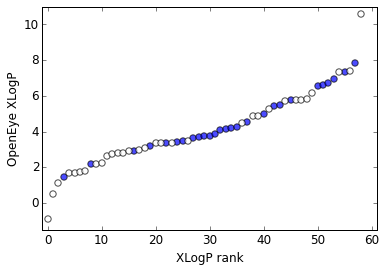

In [25]:
XlogP_array_yes_sorted = df_exp_mol_yes_sorted.ix[:,"XlogP"]
XlogP_rank_array_yes_sorted = df_exp_mol_yes_sorted.ix[:,"XlogP rank"]
XlogP_array_no_sorted = df_exp_mol_no_sorted.ix[:,"XlogP"]
XlogP_rank_array_no_sorted = df_exp_mol_no_sorted.ix[:,"XlogP rank"]

fig = plt.figure(1, figsize=(6,4))

plt.scatter(XlogP_rank_array_yes_sorted, XlogP_array_yes_sorted, alpha=0.7, c="b", s=40 )
plt.scatter(XlogP_rank_array_no_sorted, XlogP_array_no_sorted, alpha=0.7,  c="w", s=40)
plt.xlabel("XLogP rank")
plt.ylabel("OpenEye XLogP")
plt.xlim(-1,61)
plt.ylim(-1.5,11)
#plt.axvline(x=7.0) # decision criteria based on SpMax4
plt.savefig("XlogP_rank.png", dpi=200)
plt.savefig("XlogP_rank.svg")

### B.2. XLogP Box Plot

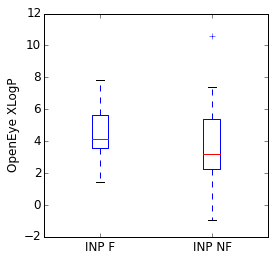

In [26]:
df_exp_yes = df_exp_mol.loc[df_exp_mol["Experimental INP Formation"] == "Yes"].reset_index(drop=True)
df_exp_no = df_exp_mol.loc[df_exp_mol["Experimental INP Formation"] == "No"].reset_index(drop=True)
XLogP_array_yes = df_exp_yes.ix[:,"XlogP"]
XLogP_array_no = df_exp_no.ix[:,"XlogP"]

data=[XLogP_array_yes.astype(np.float), XLogP_array_no.astype(np.float)]
fig = plt.figure(1, figsize=(4,4))
ax = plt.subplot(1,1,1)

ax.boxplot(data)
ax.set_xticklabels(["INP F","INP NF"])
ax.set_ylabel("OpenEye XLogP")
fig.savefig("XlogP_boxplot.png", dpi=200)
plt.savefig("XlogP_boxplot.svg")

In [27]:
from scipy import stats
print(stats.ttest_ind(XLogP_array_yes, XLogP_array_no, equal_var=False))

import numpy as np, statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(XLogP_array_yes), sms.DescrStatsW(XLogP_array_no))
# print(cm.tconfint_diff(usevar='unequal'))
print("   95% CI: ", cm.tconfint_diff(usevar='unequal'))

Ttest_indResult(statistic=1.6268930948374536, pvalue=0.10946738819100457)
   95% CI:  (-0.19462457291657032, 1.8740111097487802)


### B.3. XLogP Logistic Regression

In [28]:
from scipy import optimize

def logistic(params,x):
    """ 
    Logistic function

    Parameters
    ----------
    params : list or numpy array
      the three parameters of the logistic function
      First parameter is set to 1, to make function
      span 0 to 1.
    x : numpy array
      the explanatory variable
   
    Return
    ------
    numpy array
      the output of the logistic function

    """
    params[0]=1
    return params[0]/(1+np.exp(-x*params[1] - params[2])) 

def residuals(params):
    predicted = logistic(params,x)
    return np.sum((y-predicted)**2)

In [29]:
df_exp_mol["Experimental Category"]=None

for i,row in enumerate(df_exp_mol.iterrows()):
    if df_exp_mol.ix[i,"Experimental INP Formation"] == "Yes" :
        df_exp_mol.ix[i, "Experimental Category"] = 1
    else:
        df_exp_mol.ix[i, "Experimental Category"] = 0

df_exp_mol.head()

,FILENAME,Drug Name,smiles,XlogP,SpMAX4_Bh(s),ALOGP2,CLogP,Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,Experimental Category
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,6.948,7.00,67.200,10.04,Yes,Validation,1
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,3.37,4.72,17.700,4.43,No,Validation,0
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,-0.918,5.01,1.800,1.35,No,Validation,0
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,4.077,8.00,16.000,3.05,Yes,Validation,1
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,7.36,4.79,67.695,9.70,Yes,Validation,1


For XlogP: The predicted parameters are [ 1.          0.2243944  -1.06147626]
         Threshold logP:  4.73040448664


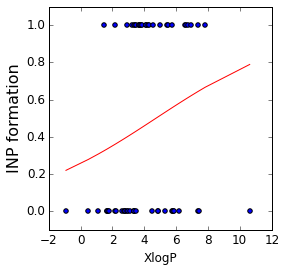

In [30]:
fig = plt.figure(1, figsize=(4,4), dpi=200)

df_sorted = df_exp_mol.sort_values(by="XlogP", ascending=1).reset_index(drop=True)
initial_guess = [1,1,1]
x=df_sorted.ix[:, "XlogP"].astype(float)
y=df_sorted.ix[:, "Experimental Category"]

fit = optimize.minimize(residuals,initial_guess,method='BFGS')
print("For {}: The predicted parameters are".format("XlogP"), fit.x)

# Inflection point is x_0/b
threshold_logP=(-1)*fit.x[2]/fit.x[1]
print("         Threshold logP: ", threshold_logP)

plt.scatter(x,y)
predicted = logistic(fit.x, x)
plt.plot(x,predicted,color="red")
plt.ylim(-0.1, 1.1)
plt.xlabel('XlogP')
plt.ylabel('INP formation', size=16)
plt.savefig("XlogP_logistic_fit.png", dpi=200)
plt.savefig("XlogP_logistic_fit.svg")

### B.4. XLogP ROC Curve

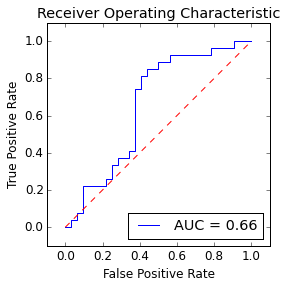

In [31]:
from sklearn import metrics

y_actual = df_sorted["Experimental Category"]
# predicted score come from logistic regression
y_predicted = predicted

# ROC
fpr, tpr, thresholds = metrics.roc_curve(y_actual, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Bootstrap for ROC AUC confidence intervals

Original ROC area: 0.660
95% Confidence interval for the score: [0.506 - 0.794]


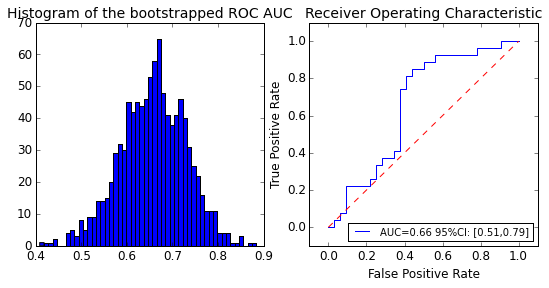

In [32]:
y_actual = np.array(y_actual).astype(int)
y_predicted = np.array(y_predicted)
print("Original ROC area: {:0.3f}".format(metrics.roc_auc_score(y_actual, y_predicted)))

n_bootstraps = 1000
rng_seed = 0  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):

    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.random_integers(0, len(y_predicted) - 1, len(y_predicted))
 
    if len(np.unique(y_actual[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = metrics.roc_auc_score(y_actual[indices], y_predicted[indices])
    bootstrapped_scores.append(score)
    #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

fig = plt.figure(1, figsize=(9,4))
plt.subplot(1,2,1)
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC', size=14)
# plt.show()

sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 95% confidence interval
# 95% CI percentiles to 0.025 and 0.975
confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
print("95% Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

# Plotting ROC curve
#fig = plt.figure(1, figsize=(4,4))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic', size =14)
plt.plot(fpr, tpr, 'b', label='AUC={0:0.2f} 95%CI: [{1:0.2f},{2:0.2f}]'.format(roc_auc, confidence_lower, confidence_upper))
plt.legend(loc='lower right', prop={'size':10})
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("XlogP_ROC_with_histogram.png", dpi=200)
plt.savefig("XlogP_ROC_with_histogram.svg")

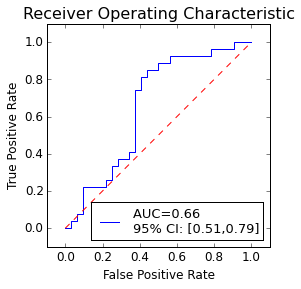

In [33]:
# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic', size=16)
plt.plot(fpr, tpr, 'b', label='AUC={0:0.2f} \n95% CI: [{1:0.2f},{2:0.2f}]'.format(roc_auc, confidence_lower, confidence_upper))
plt.legend(loc='lower right', prop={'size':13})
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("XlogP_ROC.png", dpi=200)
plt.savefig("XlogP_ROC.svg")

### B.5. XLogP Confusion Matrix

In [33]:
df_exp_mol["NP Pred"]= None
    
for i, row in enumerate(df_exp_mol.iterrows()):
    logP = float(df_exp_mol.ix[i, "XlogP"])
    #print(logD)
    if logP < threshold_logP:
        df_exp_mol.ix[i, "NP Pred"] = 0
    else:
        df_exp_mol.ix[i, "NP Pred"] = 1
df_exp_mol.head()

,FILENAME,NAME,smiles,XlogP,SpMAX4_Bh(s),ALOGP2,CLogP,Forms,Group,NP?,NP Pred
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,6.948,7.00,67.200,10.04,Yes,Validation,1,1
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,3.37,4.72,17.700,4.43,No,Validation,0,0
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,-0.918,5.01,1.800,1.35,No,Validation,0,0
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,4.077,8.00,16.000,3.05,Yes,Validation,1,0
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,7.36,4.79,67.695,9.70,Yes,Validation,1,1


In [34]:
exp_NP = df_exp_mol.ix[:,"NP?"].astype(int)
pred_NP = df_exp_mol.ix[:, "NP Pred"].astype(int)

actual = pd.Series(exp_NP, name= "Actual")
predicted = pd.Series(pred_NP, name= "Predicted")
df_confusion = pd.crosstab(actual, predicted)
    
# Accuracy = (TP+TN)/(TP+TN+FP+FN)
TP = df_confusion.ix[1,1]
TN = df_confusion.ix[0,0]
FP = df_confusion.ix[0,1]
FN = df_confusion.ix[1,0]
    
accuracy = (TP+TN)/(TP+TN+FP+FN)
    
print("OpenEye XlogP", "\nAccuracy: {:.2f}".format(accuracy))
print("XlogP threshold= {:.2f}\n".format(threshold_logP))
print(df_confusion)

OpenEye XlogP 
Accuracy: 0.53
XlogP threshold= 4.81

Predicted   0   1
Actual           
0          22  11
1          17  10


##C. Chem3D CLogP

### C.1. Plot CLogP vs CLogP rank

In [35]:
df_exp_mol_sorted = df_exp_mol.sort_values(by="CLogP", ascending=1).reset_index(drop=True)
df_exp_mol_sorted["CLogP rank"]=df_exp_mol_sorted.index
#df_exp_mol_sorted.head()

df_exp_mol_yes_sorted = df_exp_mol_sorted.loc[df_exp_mol_sorted["Forms"] == "Yes"].reset_index(drop=True)
df_exp_mol_no_sorted = df_exp_mol_sorted.loc[df_exp_mol_sorted["Forms"] == "No"].reset_index(drop=True)
df_exp_mol_no_sorted.head()

,FILENAME,NAME,smiles,XlogP,SpMAX4_Bh(s),ALOGP2,CLogP,Forms,Group,NP?,NP Pred,CLogP rank
0,Talazoparib.mol,Talazoparib,Cn1c(ncn1)[C@H]2c3c4c(cc(cc4N[C@@H]2c5ccc(cc5)...,2.178,5.07,6.1,0.35,No,Validation,0,0,0
1,Camptotecin.mol,Camptotecin,CC[C@@]1(c2cc-3n(c(=O)c2COC1=O)Cc4c3nc5ccccc5c4)O,1.661,4.99,3.0,0.60,No,Training,0,0,1
2,Voxtalisib.mol,Voxtalisib,CCn1c2c(cc(c1=O)c3ccn[nH]3)c(nc(n2)N)C,0.486,4.62,0.7,0.74,No,Validation,0,0,2
3,ZSTK474.mol,ZSTK474,c1ccc2c(c1)nc(n2c3nc(nc(n3)N4CCOCC4)N5CCOCC5)C...,1.116,4.91,11.3,1.05,No,Validation,0,0,3
4,Forskolin.mol,Forskolin,CC(=O)O[C@H]1[C@H]([C@@H]2[C@]([C@H](CCC2(C)C)...,1.712,6.44,0.5,1.31,No,Validation,0,0,4


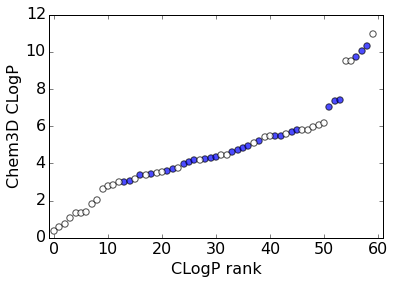

In [36]:
CLogP_array_yes_sorted = df_exp_mol_yes_sorted.ix[:,"CLogP"]
CLogP_rank_array_yes_sorted = df_exp_mol_yes_sorted.ix[:,"CLogP rank"]
CLogP_array_no_sorted = df_exp_mol_no_sorted.ix[:,"CLogP"]
CLogP_rank_array_no_sorted = df_exp_mol_no_sorted.ix[:,"CLogP rank"]
plt.rcParams.update({'font.size': 16})
fig = plt.figure(1, figsize=(6,4))

plt.scatter(CLogP_rank_array_yes_sorted, CLogP_array_yes_sorted, alpha=0.7, c="b", s=40)
plt.scatter(CLogP_rank_array_no_sorted, CLogP_array_no_sorted, alpha=0.7,  c="w", s=40)
plt.xlabel("CLogP rank")
plt.ylabel("Chem3D CLogP")
plt.xlim(-1,61)
plt.ylim(-0,12)
#plt.axvline(x=7.0) # decision criteria based on SpMax4
plt.savefig("CLogP_rank.png", dpi=200)
plt.savefig("CLogP_rank.svg")

### C.2. CLogP Box Plot

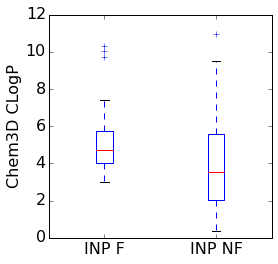

In [37]:
df_exp_yes = df_exp_mol.loc[df_exp_mol["Forms"] == "Yes"].reset_index(drop=True)
df_exp_no = df_exp_mol.loc[df_exp_mol["Forms"] == "No"].reset_index(drop=True)
CLogP_array_yes = df_exp_yes.ix[:,"CLogP"]
CLogP_array_no = df_exp_no.ix[:,"CLogP"]

data=[CLogP_array_yes.astype(np.float), CLogP_array_no.astype(np.float)]
fig = plt.figure(1, figsize=(4,4))
ax = plt.subplot(1,1,1)

ax.boxplot(data)
ax.set_xticklabels(["INP F","INP NF"])
ax.set_ylabel("Chem3D CLogP")
fig.savefig("CLogP_boxplot.png", dpi=200)
plt.savefig("CLogP_boxplot.svg")

In [38]:
from scipy import stats
print(stats.ttest_ind(CLogP_array_yes, CLogP_array_no, equal_var=False))

import numpy as np, statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(CLogP_array_yes), sms.DescrStatsW(CLogP_array_no))
# print(cm.tconfint_diff(usevar='unequal'))
print("   95% CI: ", cm.tconfint_diff(usevar='unequal'))

Ttest_indResult(statistic=2.1098881539269869, pvalue=0.039196930059147247)
   95% CI:  (0.065218579360229345, 2.479831925690275)


### C.3. CLogP Logistic Regression

In [39]:
from scipy import optimize

def logistic(params,x):
    """ 
    Logistic function

    Parameters
    ----------
    params : list or numpy array
      the three parameters of the logistic function
      First parameter is set to 1, to make function
      span 0 to 1.
    x : numpy array
      the explanatory variable
   
    Return
    ------
    numpy array
      the output of the logistic function

    """
    params[0]=1
    return params[0]/(1+np.exp(-x*params[1] - params[2])) 

def residuals(params):
    predicted = logistic(params,x)
    return np.sum((y-predicted)**2)

In [40]:
df_exp_mol["NP?"]=None

for i,row in enumerate(df_exp_mol.iterrows()):
    if df_exp_mol.ix[i,"Forms"] == "Yes" :
        df_exp_mol.ix[i, "NP?"] = 1
    else:
        df_exp_mol.ix[i, "NP?"] = 0

df_exp_mol.head()

,FILENAME,NAME,smiles,XlogP,SpMAX4_Bh(s),ALOGP2,CLogP,Forms,Group,NP?,NP Pred
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,6.948,7.00,67.200,10.04,Yes,Validation,1,1
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,3.37,4.72,17.700,4.43,No,Validation,0,0
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,-0.918,5.01,1.800,1.35,No,Validation,0,0
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,4.077,8.00,16.000,3.05,Yes,Validation,1,0
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,7.36,4.79,67.695,9.70,Yes,Validation,1,1


For CLogP: The predicted parameters are [ 1.          0.23573037 -1.23807784]
         Threshold logP:  5.25209314571


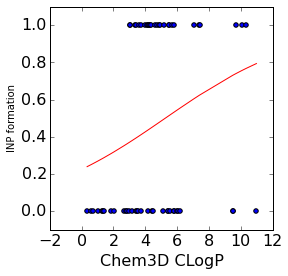

In [41]:
fig = plt.figure(1, figsize=(4,4), dpi=200)

df_sorted = df_exp_mol.sort_values(by="CLogP", ascending=1).reset_index(drop=True)
initial_guess = [1,1,1]
x=df_sorted.ix[:, "CLogP"].astype(float)
y=df_sorted.ix[:, "NP?"]

fit = optimize.minimize(residuals,initial_guess,method='Nelder-Mead')
print("For {}: The predicted parameters are".format("CLogP"), fit.x)

# Inflection point is x_0/b
threshold_logP=(-1)*fit.x[2]/fit.x[1]
print("         Threshold logP: ", threshold_logP)

plt.scatter(x,y)
predicted = logistic(fit.x, x)
plt.plot(x,predicted,color="red")
plt.ylim(-0.1, 1.1)
plt.xlabel('Chem3D CLogP')
plt.ylabel('INP formation', size=10)
plt.savefig("CLogP_logistic_fit.png", dpi=200)
plt.savefig("CLogP_logistic_fit.svg")

### C.4. CLogP ROC Curve

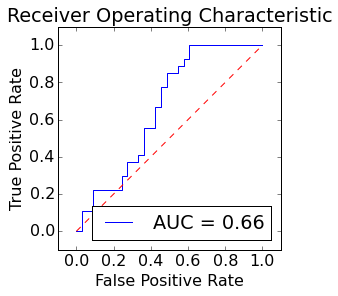

In [42]:
from sklearn import metrics

y_actual = df_sorted["NP?"]
# predicted score come from logistic regression
y_predicted = predicted

# ROC
fpr, tpr, thresholds = metrics.roc_curve(y_actual, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Bootstrap for ROC AUC confidence intervals

Original ROC area: 0.662
95% Confidence interval for the score: [0.515 - 0.791]


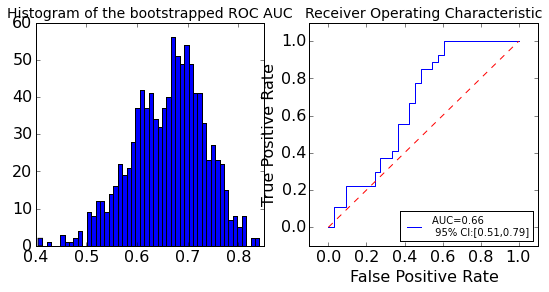

In [43]:
y_actual = np.array(y_actual).astype(int)
y_predicted = np.array(y_predicted)
print("Original ROC area: {:0.3f}".format(metrics.roc_auc_score(y_actual, y_predicted)))

n_bootstraps = 1000
rng_seed = 0  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):

    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.random_integers(0, len(y_predicted) - 1, len(y_predicted))
 
    if len(np.unique(y_actual[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = metrics.roc_auc_score(y_actual[indices], y_predicted[indices])
    bootstrapped_scores.append(score)
    #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

fig = plt.figure(1, figsize=(9,4))
plt.subplot(1,2,1)
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC', size=14)
# plt.show()

sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 95% confidence interval
# 95% CI percentiles to 0.025 and 0.975
confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
print("95% Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

# Plotting ROC curve
#fig = plt.figure(1, figsize=(4,4))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic', size=14)
plt.plot(fpr, tpr, 'b', label='AUC={0:0.2f} \n 95% CI:[{1:0.2f},{2:0.2f}]'.format(roc_auc, confidence_lower, confidence_upper))
plt.legend(loc='lower right', prop={'size':10})
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("CLogP_ROC_with_histogram.png", dpi=200)
plt.savefig("CLogP_ROC_with_histogram.svg")

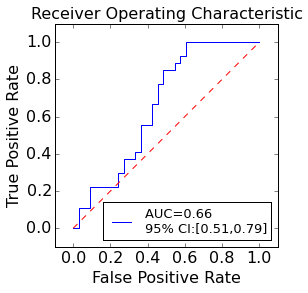

In [44]:
# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic', size=16)
plt.plot(fpr, tpr, 'b', label='AUC={0:0.2f} \n95% CI:[{1:0.2f},{2:0.2f}]'.format(roc_auc, confidence_lower, confidence_upper))
plt.legend(loc='lower right', prop={'size':13})
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("CLogP_ROC.png", dpi=200)
plt.savefig("CLogP_ROC.svg")

### C.5. CLogP Confusion Matrix

In [34]:
# Predicted INP formation category based on cLogP value
df_exp_mol["Pred Category by cLogP"]= None
    
for i, row in enumerate(df_exp_mol.iterrows()):
    logP = float(df_exp_mol.ix[i, "CLogP"])
    #print(logD)
    if logP < threshold_logP:
        df_exp_mol.ix[i, "Pred Category by cLogP"] = 0
    else:
        df_exp_mol.ix[i, "Pred Category by cLogP"] = 1
df_exp_mol.head()

,FILENAME,Drug Name,smiles,XlogP,SpMAX4_Bh(s),ALOGP2,CLogP,Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,Experimental Category,Pred Category by cLogP
0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,6.948,7.00,67.200,10.04,Yes,Validation,1,1
1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,3.37,4.72,17.700,4.43,No,Validation,0,0
2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,-0.918,5.01,1.800,1.35,No,Validation,0,0
3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,4.077,8.00,16.000,3.05,Yes,Validation,1,0
4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,7.36,4.79,67.695,9.70,Yes,Validation,1,1


In [35]:
exp_NP = df_exp_mol.ix[:,"Experimental Category"].astype(int)
pred_NP = df_exp_mol.ix[:, "Pred Category by cLogP"].astype(int)

actual = pd.Series(exp_NP, name= "Actual")
predicted = pd.Series(pred_NP, name= "Predicted")
df_confusion = pd.crosstab(actual, predicted)
    
# Accuracy = (TP+TN)/(TP+TN+FP+FN)
TP = df_confusion.ix[1,1]
TN = df_confusion.ix[0,0]
FP = df_confusion.ix[0,1]
FN = df_confusion.ix[1,0]
    
accuracy = (TP+TN)/(TP+TN+FP+FN)
    
print("Chem3D CLogP", "\nAccuracy: {:.2f}".format(accuracy))
print("CLogP threshold= {:.2f}\n".format(threshold_logP))
print(df_confusion)

Chem3D CLogP 
Accuracy: 0.56
CLogP threshold= 4.73

Predicted   0   1
Actual           
0          20  12
1          14  13
